In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.0 MB/s 
     |████████████████████████████████| 465 kB 55.8 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-12-13 05:05:23--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (b

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#데이터 로드하기
#total
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")
#train
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
#test
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
#열 제목 부여
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력

total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)

#중복확인
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()
train_data['document'].nunique(), train_data['label'].nunique()
test_data['document'].nunique(), test_data['label'].nunique()
# reviews 열에서 중복인 내용이 있다면 중복 제거
total_data.drop_duplicates(subset=['reviews'], inplace=True) 
# document 열에서 중복인 내용이 있다면 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True) 
test_data.drop_duplicates(subset=['document'], inplace=True) 
print('총 샘플의 수 :',len(total_data))
print('총 샘플의 수 :',len(train_data))

#null 값 확인
print(total_data.isnull().values.any())
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())

print('전체 네이버 리뷰의 개수 :', len(total_data))
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))
# Null 값이 존재하는 행 제거
train_data = train_data.dropna(how = 'any')
test_data = test_data.dropna(how = 'any')


전체 리뷰 개수 : 200000
훈련용 리뷰 개수 : 150000
테스트용 리뷰 개수 : 50000
총 샘플의 수 : 199908
총 샘플의 수 : 146183
False
True
True
전체 네이버 리뷰의 개수 : 199908
훈련용 리뷰의 개수 : 146183
테스트용 리뷰의 개수 : 49158


False
False
   label  count
0      0  73342
1      1  72840


<ipython-input-3-86c9a6362365>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  total_data['reviews'] = total_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


ratings    0
reviews    0
label      0
dtype: int64


<ipython-input-3-86c9a6362365>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-3-86c9a6362365>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-3-86c9a6362365>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "")
<ipython-input-3-86c9a6362365>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "")


id            0
document    789
label         0
dtype: int64
id            0
document    305
label         0
dtype: int64
전처리 후 train 샘플 갯수:  145393
전처리 후 test 샘플 갯수 48852


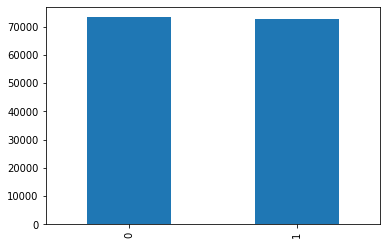

In [ ]:
# Null 값이 존재하는지 확인
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())
train_data['label'].value_counts().plot(kind = 'bar')
print(train_data.groupby('label').size().reset_index(name = 'count'))
#원본데이터지우는게아니라 복사데이터지우는거로 지정
total_data = total_data.copy()[:] 
# 중복 제거
total_data.drop_duplicates(subset = ['reviews'], inplace=True)
# 한글과 공백을 제외하고 모두 제거
total_data['reviews'] = total_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
total_data['reviews'].replace('', np.nan, inplace=True)
print(total_data.isnull().sum())
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
test_data[:5]
# white space 데이터를 empty value로 변경
train_data['document'] = train_data['document'].str.replace('^ +', "") 
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

# white space 데이터를 empty value로 변경
test_data['document'] = test_data['document'].str.replace('^ +', "") 
test_data['document'].replace('', np.nan, inplace=True)
print(test_data.isnull().sum())
train_data = train_data.dropna(how = 'any')
print('전처리 후 train 샘플 갯수: ',len(train_data))
test_data = test_data.dropna(how = 'any')
print('전처리 후 test 샘플 갯수',len(test_data))


In [ ]:
#토큰화
mecab = Mecab()
#예시
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))
#필요없는 토큰 제거
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', 
             '와', '네', '들', '듯', '지', '임', '게','으로','하다','자']
#토큰화하고 필요없는거 제거
total_data['tokenized'] = total_data['reviews'].apply(mecab.morphs)
total_data['tokenized'] = total_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
#토큰화하고 필요없는거 제거
test_data['tokenized'] = test_data['document'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data['tokenized'] = train_data['document'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
#긍정부정 리뷰에 무슨 단어있는지 보기
negative_words1 = np.hstack(total_data[total_data.label == 0]['tokenized'].values)
positive_words1 = np.hstack(total_data[total_data.label == 1]['tokenized'].values)

negative_words2 = np.hstack(test_data[test_data.label == 0]['tokenized'].values)
positive_words2 = np.hstack(test_data[test_data.label == 1]['tokenized'].values)

negative_words = np.hstack((negative_words1, negative_words2))
positive_words = np.hstack((positive_words1, positive_words2))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


부정
[('네요', 43313), ('는데', 28924), ('안', 28561), ('어요', 20055), ('있', 19514), ('너무', 19344), ('했', 17022), ('없', 15400), ('좋', 14294), ('같', 13449), ('거', 13405), ('어', 13278), ('배송', 12874), ('나', 12614), ('되', 12515), ('그냥', 12138), ('않', 11877), ('구매', 11743), ('아요', 11703), ('습니다', 11683)]
긍정
[('좋', 56025), ('아요', 28570), ('네요', 28511), ('잘', 26404), ('어요', 26366), ('구매', 21612), ('있', 20060), ('습니다', 19367), ('는데', 17626), ('배송', 16320), ('했', 14327), ('합니다', 13504), ('너무', 13231), ('먹', 12960), ('재', 12886), ('같', 11914), ('영화', 10120), ('보', 10099), ('어', 9834), ('만족', 9798)]
긍정 리뷰의 평균 길이 : 13.523145878562925
부정 리뷰의 평균 길이 : 16.951568205692563


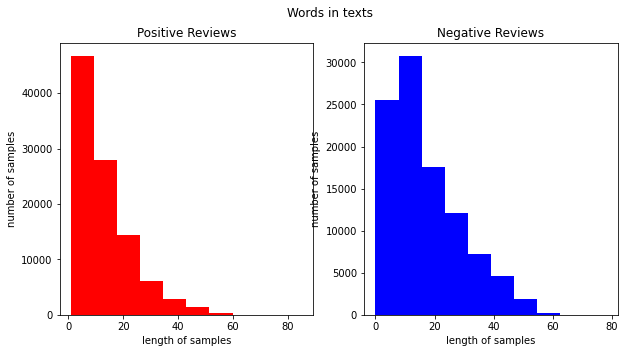

In [ ]:
#각 단어 빈도수 카운트
negative_word_count = Counter(negative_words)
print('부정')
print(negative_word_count.most_common(20))

positive_word_count = Counter(positive_words)
print('긍정')
print(positive_word_count.most_common(20))
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

text_len = total_data[total_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = total_data[total_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
#긍정보단 부정리뷰의 길이가 더 길다
X_total= total_data['tokenized'].values
y_total = total_data['label'].values
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values
#단어집합 생성, 단어에 고유 정수 부여
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_total)
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 45654
등장 빈도가 1번 이하인 희귀 단어의 수: 20834
단어 집합에서 희귀 단어의 비율: 45.63455557015815
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.6839625970881197


단어 집합의 크기 : 24822
리뷰의 최대 길이 : 85
리뷰의 평균 길이 : 15.23737419212838


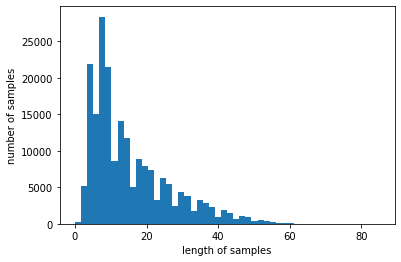

In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_total)
X_total = tokenizer.texts_to_sequences(X_total)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
y_total = np.array(total_data['label'])
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])
print('리뷰의 최대 길이 :',max(len(l) for l in X_total))
print('리뷰의 평균 길이 :',sum(map(len, X_total))/len(X_total))
plt.hist([len(s) for s in X_total], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
#빈 샘플 제거
drop_total = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
drop_train = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
# 빈 샘플들을 제거
X_total = np.delete(X_total, drop_total, axis=0)
y_total = np.delete(y_total, drop_total, axis=0)
print(len(X_total))
print(len(y_total))

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

199907
199907
145392
145392
48851
48851


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
#80으로 패딩 할 경우 보존 잘하는지 확인
max_len = 80
below_threshold_len(max_len, X_total)
#99프로 이상 보존되는거 확인됨 80으로 패딩하기로 정함
X_total = pad_sequences(X_total, maxlen = max_len)
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
print(len(X_total))
print(len(y_total))

print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.99899953478368
199907
199907
145392
145392
48851
48851


In [ ]:
X_total = np.concatenate((X_total,X_train),axis=0)
y_total = np.concatenate((y_total,y_train),axis=0)

X_train = X_total
y_train = y_total
print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

345299
345299
48851
48851


모델 만들기

In [ ]:
# CNN모델
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.engine.base_layer import Layer

In [ ]:
#기존 lstm
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.datasets import load_iris

embedding_dim = 100
hidden_units = 128
iris_data = load_iris()

x = iris_data['data']
y = iris_data['target']

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
class MyDense(Layer):
    def __init__(self,
               units,
               activation=True,
               use_bias=True,
               kernel_initializer='glorot_uniform', # 균등분포로 초기화
               bias_initializer='zeros',
               **kwargs):
        super(MyDense, self).__init__(**kwargs)
        self.units = int(units)
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
    
    def build(self, input_shape):
        input_shape = tf.TensorShape(input_shape)
        last_dim = tf.compat.dimension_value(input_shape[-1])
    
        self.kernel = self.add_weight(
            'kernel',
            shape=[last_dim, self.units],
            initializer=self.kernel_initializer)
        self.bias = self.add_weight(
            'bias',
            shape=[self.units,],
            initializer=self.bias_initializer)
    
    def call(self, inputs):
        rank = inputs.shape.rank # 랭크는 차원
        if rank == 2:
              outputs = tf.matmul(a=inputs, b=self.kernel)
        elif rank>=3: # 3차원 이상에서는 matmul사용시 오류
              outputs = tf.tensordot(inputs, self.kernel, [[rank - 1], [0]])

        if self.use_bias:
              outputs = tf.nn.bias_add(outputs, self.bias)
        return outputs

    def compute_output_shape(self, input_shape):
        return input_shape[:-1].concatenate(self.units)

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


In [ ]:
class SentenceEmbedding(layers.Layer):
    def __init__(self, **kargs):
        super(SentenceEmbedding, self).__init__()

        self.conv = layers.Conv1D(kargs['conv_num_filters'], kargs['conv_window_size'], 
                                activation=tf.keras.activations.relu, 
                                padding='same')
        self.max_pool = layers.MaxPool1D(kargs['max_pool_seq_len'], 1)
        self.dense = layers.Dense(kargs['sent_embedding_dimension'], 
                              activation=tf.keras.activations.relu)

    def call(self, x):
        x = self.conv(x)
        x = self.max_pool(x)
        x = self.dense(x)
        
        return tf.squeeze(x, 1)

In [ ]:
class emotion_classify_Model(tf.keras.Model):
    def __init__(self, **kargs):
        super(emotion_classify_Model, self).__init__(name=kargs['model_name'])
        
        self.word_embedding = layers.Embedding(kargs['vocab_size'], kargs['word_embedding_dimension'])
        self.base_encoder = SentenceEmbedding(**kargs)
        self.hypo_encoder = SentenceEmbedding(**kargs)
        self.dense = layers.Dense(kargs['hidden_dimension'], 
                                           activation=tf.keras.activations.relu)
        self.logit = layers.Dense(1, activation=tf.keras.activations.sigmoid)
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        
    def call(self, x):
        x1 = x
        b_x = self.word_embedding(x1)
        b_x = self.dropout(b_x)
        h_x = self.dropout(h_x)
        
        b_x = self.base_encoder(b_x)
        h_x = self.hypo_encoder(h_x)
        
        e_x = tf.concat([b_x, h_x], -1)
        e_x = self.dense(e_x)
        e_x = self.dropout(e_x)
        
        return self.logit(e_x)


In [ ]:
class Pooling1D(Layer):
    def __init__(self, pool_function, pool_size, strides,
               padding='valid', data_format='channels_last',
               name=None, **kwargs):
        super(Pooling1D, self).__init__(name=name, **kwargs)
        self.pool_function = pool_function
        self.pool_size = conv_utils.normalize_tuple(pool_size, 1, 'pool_size')
        self.strides = conv_utils.normalize_tuple(
            strides, 1, 'strides', allow_zero=True)
        self.padding = conv_utils.normalize_padding(padding)
        self.data_format = conv_utils.normalize_data_format(data_format)
        self.input_spec = InputSpec(ndim=3)

    def call(self, inputs):
        pad_axis = 2
        inputs = tf.expand_dims(inputs, pad_axis)
        outputs = self.pool_function(
            inputs,
            self.pool_size + (1,),
            strides=self.strides + (1,),
            padding=self.padding,
            data_format=self.data_format)
        return tf.squeeze(outputs, pad_axis)

class MyMaxPooling1D(Pooling1D):
    def __init__(self, pool_size=2, strides=None,
               padding='valid', data_format='channels_last', **kwargs):

        super(MyMaxPooling1D, self).__init__(
            functools.partial(backend.pool2d, pool_mode='max'),
            pool_size=pool_size,
            strides=strides,
            padding=padding,
            data_format=data_format,
            **kwargs)

In [ ]:
model_name = 'emotion_classify'
BATCH_SIZE = 1024
NUM_EPOCHS = 100
VALID_SPLIT = 0.1
MAX_LEN = 31

kargs = {'model_name': model_name,
         'vocab_size': vocab_size,
         'word_embedding_dimension': 100,
         'conv_num_filters': 300,
         'conv_window_size': 3,
         'max_pool_seq_len': MAX_LEN,
         'sent_embedding_dimension': 128,
         'dropout_rate': 0.2,
         'hidden_dimension': 200,
         'output_dimension':1}


In [ ]:
#model = emotion_classify_Model(**kargs)
#모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
#모델 학습시키기
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
train_loss, train_acc = model.evaluate(x,  y, verbose=2)
test_loss, test_acc = model.evaluate(x,  y, verbose=2)

Epoch 1/15
4317/4317 [==============================] - ETA: 0s - loss: 0.2992 - acc: 0.8767
Epoch 1: val_acc improved from -inf to 0.81911, saving model to best_model.h5
4317/4317 [==============================] - 50s 10ms/step - loss: 0.2992 - acc: 0.8767 - val_loss: 0.3947 - val_acc: 0.8191
Epoch 2/15
4316/4317 [============================>.] - ETA: 0s - loss: 0.2529 - acc: 0.8999
Epoch 2: val_acc improved from 0.81911 to 0.83333, saving model to best_model.h5
4317/4317 [==============================] - 42s 10ms/step - loss: 0.2529 - acc: 0.8999 - val_loss: 0.3838 - val_acc: 0.8333
Epoch 3/15
4314/4317 [============================>.] - ETA: 0s - loss: 0.2393 - acc: 0.9069
Epoch 3: val_acc improved from 0.83333 to 0.83591, saving model to best_model.h5
4317/4317 [==============================] - 43s 10ms/step - loss: 0.2393 - acc: 0.9069 - val_loss: 0.3694 - val_acc: 0.8359
Epoch 4/15
4315/4317 [============================>.] - ETA: 0s - loss: 0.2295 - acc: 0.9113
Epoch 4: val_

In [ ]:
#모델평가하기
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

1527/1527 [==============================] - 7s 4ms/step - loss: 0.3847 - acc: 0.8399

loss_and_metrics : [0.3847016990184784, 0.8399009108543396]


In [ ]:
loaded_model = load_model('best_model.h5')

def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 문장입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 문장입니다.".format((1 - score) * 100))

In [ ]:
sentiment_predict('또 시켜먹을 것 같아요')
sentiment_predict('너 정말 가지각색으로 생겼다')
sentiment_predict('여긴 물 맛집임')
sentiment_predict('여긴 물만 맛집임')
sentiment_predict('졸업하기싫어요')

1/1 [==============================] - 0s 378ms/step
97.13% 확률로 긍정 문장입니다.
1/1 [==============================] - 0s 19ms/step
84.76% 확률로 부정 문장입니다.
1/1 [==============================] - 0s 18ms/step
79.14% 확률로 긍정 문장입니다.
1/1 [==============================] - 0s 20ms/step
71.98% 확률로 부정 문장입니다.
1/1 [==============================] - 0s 18ms/step
92.84% 확률로 부정 문장입니다.
